<a href="https://colab.research.google.com/github/ohkt4/pr/blob/main/Assign3_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [ ]:


((train_images,train_labels),(test_images,test_labels)) = datasets.cifar10.load_data()

train_images,test_images = train_images/255.0,test_images/255.0

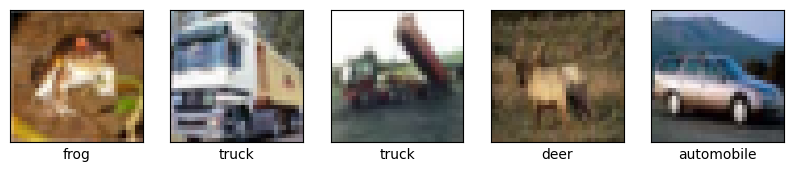

In [ ]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))
for i in range(5):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])

plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation = 'relu', input_shape=(32,32,3)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])
history = model.fit(train_images,train_labels, epochs = 50,
                    validation_data = (test_images,test_labels))

Epoch 1/50
1563/1563 [==============================] - 122s 77ms/step - loss: 1.5374 - accuracy: 0.4426 - val_loss: 1.2772 - val_accuracy: 0.5441
Epoch 2/50
1563/1563 [==============================] - 89s 57ms/step - loss: 1.1503 - accuracy: 0.5938 - val_loss: 1.0717 - val_accuracy: 0.6221
Epoch 3/50
1563/1563 [==============================] - 77s 49ms/step - loss: 1.0012 - accuracy: 0.6490 - val_loss: 0.9833 - val_accuracy: 0.6553
Epoch 4/50
1563/1563 [==============================] - 76s 48ms/step - loss: 0.8951 - accuracy: 0.6873 - val_loss: 0.9630 - val_accuracy: 0.6680
Epoch 5/50
1563/1563 [==============================] - 68s 44ms/step - loss: 0.8266 - accuracy: 0.7103 - val_loss: 0.9106 - val_accuracy: 0.6870
Epoch 6/50
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7713 - accuracy: 0.7293 - val_loss: 0.9038 - val_accuracy: 0.6888
Epoch 7/50
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7230 - accuracy: 0.7455 - val_loss: 0.8735 

In [ ]:
plt.plot(history.history["accuracy"],label = "accuracy")
plt.plot(history.history["val_accuracy"],label = "val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.ylim([0.5,1])
plt.legend("lower right")

NameError: ignored